# Raíces de funciones uni-dimensionales

En este notebook, investigaremos algunos algoritmos para encontrar **raíces** de funciones uni-dimensionales, utilizando métodos iterativos. Esto es un problema que ocurre por todos lados en la física, por ejemplo para el pozo cuadrado en mecánica cuántica, o para encontrar el valor máximo de una función.

Recuerda que $x^*$ es una raíz (o cero) de la función $f$ si $f(x^*) = 0$. Como sabemos, en general las raíces de una función no se pueden encontrar de manera analítica, excepto para funciones $f$ que sean polinomios de grado $\le 4$.

Por lo tanto, para encontrar raíces tendremos que utilizar algoritmos iterativos.
Recuerda que un algoritmo iterativo tiene la forma general

$$x_{n+1} := f(x_n),$$

y consiste en comenzar en una *adivinianza* inicial $x_0$ y generar una secuencia $x_1 := f(x_0)$; $x_2 := f(x_1)$, etc.
Si diseñamos correctamente el algoritmo, la esperanza es que la secuencia $(x_n)_{n=1}^\infty$ converja a alguna raíz  $x^*$ con $f(x^*) = 0$, es decir que $f(x_n) \to 0$ cuando $n \to \infty$.

Dado que no podemos llevar a cabo la iteración un número infinito de veces, se corta la iteración después de un cierto número de pasos, para dar una solución *aproximada*, que se encuentra dentro de cierta *tolerancia* del resultado teórico exacto $x^*$. Por lo tanto, cualquier algoritmo iterativo requiere una condición de terminación.

# Raíces de funciones: Bisección

Un primer método para encontrar una raíz es el **método de bisección**.
Dada una función continua $f$, una condición suficiente (pero no necesaria) para que *exista* una raiz en un intervalo dado $[a, b]$ es que $F$ cambie de signo en el intervalo, es decir, que $f(a)$ y $f(b)$ tengan signos opuestos. Si ocurre esto, entonces el teorema del valor intermedio nos dice que se sigue que $f$ sí tiene al menos una raíz en $[a, b]$.

#### Ejercicio 1

La idea del método de bisección es adivinar que el punto medio del intervalo $[a, b]$ sea una primera aproximación para la raíz. Escribamos una función `bisección` que implemente este método, que toma como argumento la función $f$ y los extremos `a` y `b`.

(i) Define una función `punto_medio` que tome $a$ y $b$ y calcule el punto medio entre ellos. Verifica que tu definición sea correcto en algunos casos.

(ii) Sea $c$ el punto medio de $[a, b]$. Esto divide el intervalo original en dos partes. Es posible (aunque improbable) que $c$ ya es la raíz, en cuyo caso ya podemos terminar la función y regresar la raíz que hemos encontrado. ¿Cómo se checa si ya es la raíz? Si no, ¿cómo podemos saber en cuál de los dos sub-intervalos cae la raíz? Impleméntalo. 

(iii) Define un algoritmo iterativo al repitir estos pasos hasta que encuentres la raíz con cierta tolerancia. [Pista: Para la siguiente vuelta del bucle, deberás tener un nuevo intervalo `[a, b]`.
Puedes utilizar una expresión de la forma `(e, f) = (g, h)` para copiar el valor de `g` a la variable `e` y el valor de `h` a la variable `f`.]

(iv) La función debe regresar la raíz que encontró, así como un vector de todos los iterados.

In [92]:
#(i)
function punto_medio(a,b)
    pm=(a+b)/2
    return pm 
end

punto_medio (generic function with 1 method)

In [93]:
#Verificar
using Plots
function ploti(a,b)
    A=punto_medio(a,b)
    scatter([a,b],[0,0],xlim=(-20,20),ylim=(-1,1),aspect_ratio=:equal,legend=false)
    scatter!([A],[0],label="Punto medio")
end

ploti (generic function with 1 method)

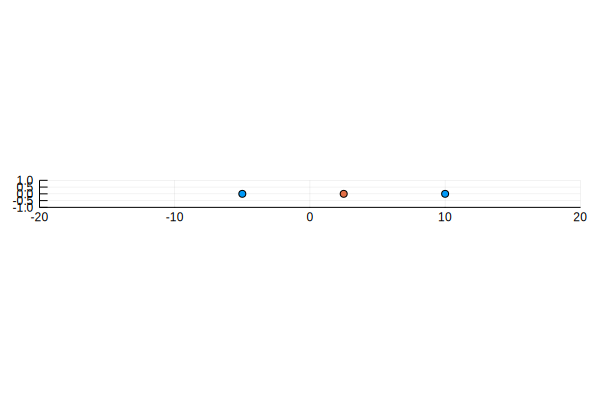

In [94]:
ploti(-5,10)#variar a y b para verificar que en efecto es el punto medio

In [95]:
#(ii)
#sabremos si ya es la raiz si la funcion evaluada en ese punto es igual a cero, y podemos verificar en cual subintervalo
#cae la raiz al evaluar la funcion en los limites del intervalo y en el punto medio. el subintervalo donde esta la raiz es
#en el que hay un cambio de signo. 
function ver(a,b,f) #a y b son los limites del intervalo y f es la funcion.
    x=punto_medio(a,b)
    @show x
    if f(x)==0
        println("Es la raiz")
    else
        if sign(f(a))!=sign(f(x))
            println("La raiz esta en el subintervalo izquierdo")
        else
            println("La raiz esta en el subintervalo derecho")
        end
    end
end

ver (generic function with 1 method)

In [96]:
g(x)=x^2-2
ver(1,2,g)

x = 1.5
La raiz esta en el subintervalo izquierdo


In [97]:
#(iii) y (iv) aqui implemente el algoritmo iterativo y mostre los resulados como los pide el apartado 4
function alg(a,b,f)
    A=[]
    while true
        x=punto_medio(a,b)
        push!(A,x)
        if f(x)<0.000000000001 && f(x)>0
            return x,A
            break
        else
            if sign(f(a))!=sign(f(x))
                (a,b)=(a,x)
            else
                (a,b)=(x,b)
            end
        end
    end
end 

alg (generic function with 1 method)

In [98]:
alg(1,2,g)#la primera entrada es el resulado, la segunda es el vector de los iterados. 

(1.4142135623733338, Any[1.5, 1.25, 1.375, 1.4375, 1.40625, 1.42188, 1.41406, 1.41797, 1.41602, 1.41504  …  1.41421, 1.41421, 1.41421, 1.41421, 1.41421, 1.41421, 1.41421, 1.41421, 1.41421, 1.41421])

#### Ejercicio 2

(i) Aplica tu función `bisección` para encontrar la raíz cuadrada positiva de $2$. Para hacerlo, tendrás que escoger (a mano) intervalos iniciales que cumplan con la condición de cambio de signo. 

(ii) Define la distancia $d_n := x_n - x^*$, donde $x^*$ es la raíz. Dibuja $d_n$ como función del paso $n$. ¿Qué tan rápidamente converge $d_n$ a $0$? [Pista: Dibuja la gráfica con distintos tipos de escalas para entender la forma funcional de la convergencia.]

(iii) Encuentra la solución de la ecuación $\sin(x) = x$ utilizando bisección. ¿Qué tan rápidamente se acercan los iterados $x_n$ a la solución en este caso?

In [99]:
#(i)No me di cuenta y lo resolvi para verificar el algoritmo del ejercicio 1.
g(x)=x^2-2
alg(-1,30,g)[2][28]

1.4142136760056019

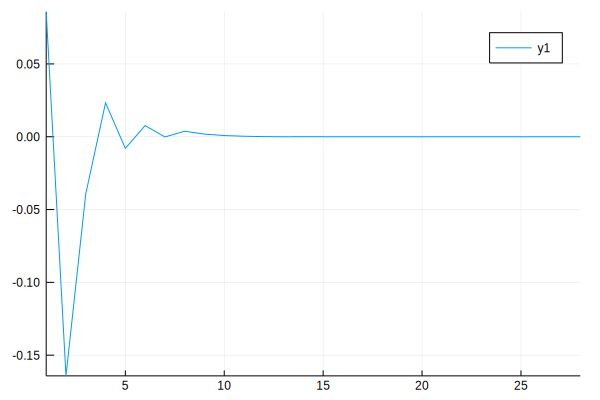

In [100]:
#(ii) Primer intento para observar la convergencia a la raiz. No nos da mucha informacion, por l que hay que intentar 
B=[]
N=[]
for i in range(1,28)
    dn=alg(1,2,g)[2][i]-alg(1,2,g)[2][28]
    push!(B,dn)
    push!(N,i)
end
using Plots
plot(N,B)

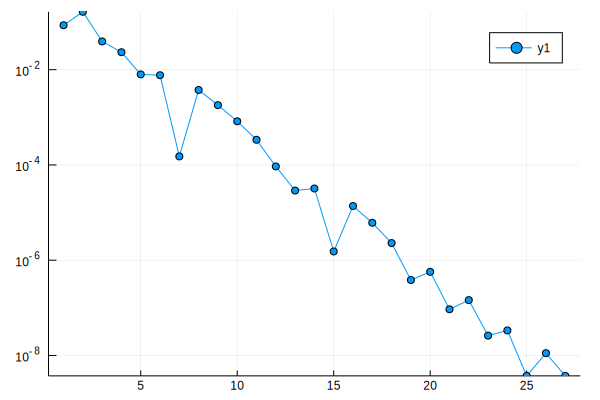

In [101]:
#(ii) para ver la grafica con otra escala redefini la distancia dn del inciso 2 y utilice yscale=log
distancia=norm.(B.- B[end])
plot(distancia[1:end-1],m='o', yscale=:log)

In [102]:
#Haciendo la regresion lineal para obtener el ajuste a una recta:
xl=1:length(distancia)-1
a,b=linreg(xl,log10.(distancia[1:end-1]))

(-0.49405545874043, -0.2971025051348409)

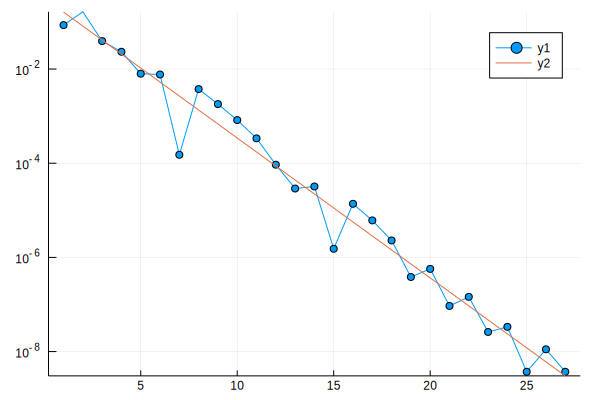

In [103]:
#Con esta grafica ya podemos observar que tan rapido converge dn a 0. Vemos que converge de manera exponencial. 
plot!(xl,exp10.(a.+b.*xl))

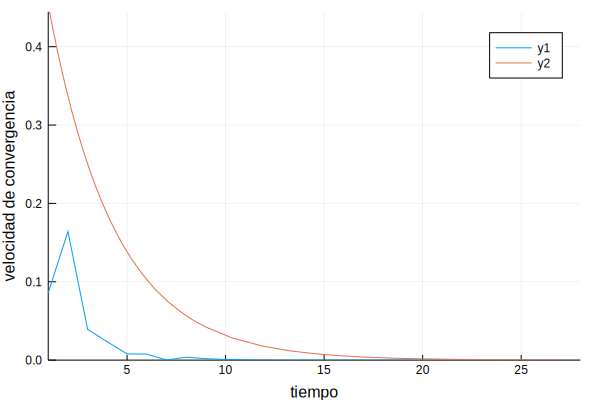

In [104]:
#regresando a escala normal, el comportamiento de decaimiento exponencial se observa explicitamente.
using SymPy
x=Sym("x")

plot(distancia, ylabel="velocidad de convergencia",xlabel="tiempo")
plot!(exp(a)*exp(b*x))

In [105]:
#(iii) Solucion de la ecuacion sin(x)=x
r1,u1=alg(1,5,x->sin(x))

(3.141592653589214, Any[3.0, 4.0, 3.5, 3.25, 3.125, 3.1875, 3.15625, 3.14063, 3.14844, 3.14453  …  3.14159, 3.14159, 3.14159, 3.14159, 3.14159, 3.14159, 3.14159, 3.14159, 3.14159, 3.14159])

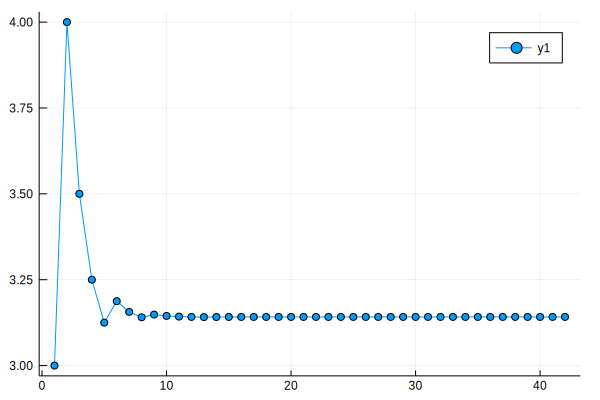

In [106]:
#repetire lo mismo que para el inciso dos
plot(u1,m='o')

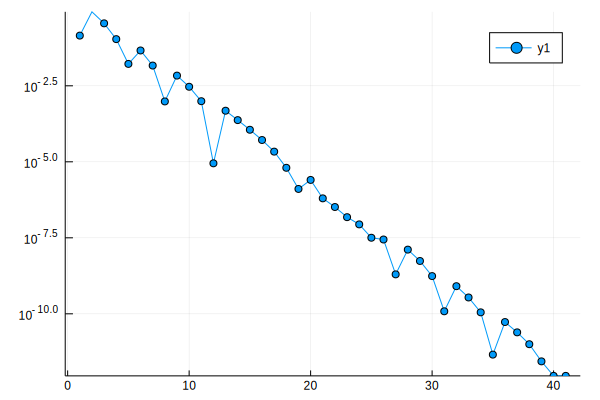

In [107]:
distanciasin=abs.(u1.-u1[end])
plot(distanciasin[1:end-1],yscale=:log,m='o')
#Se comporta igual que para el inciso dos, converge a 0 de forma exponencial. Obtendre la regresion lineal
#y hare lo mismo que para el inciso dos

In [108]:
a1,b1=linreg(xsin, log10.(distanciasin[1:end-1]))

(0.1321823273050411, -0.29909320288468455)

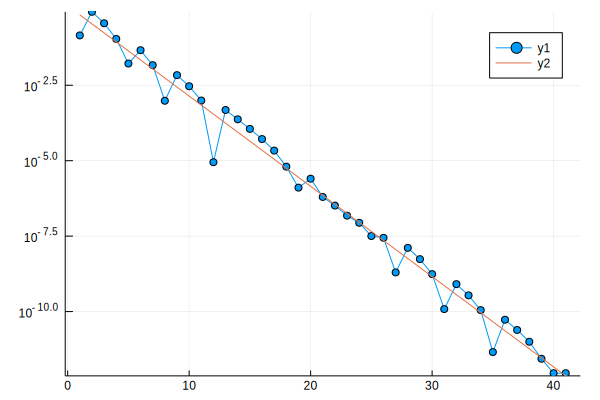

In [109]:
xsin=1:length(distanciasin)-1
plot!(xsin, exp10.(a1.+b1.*xsin))

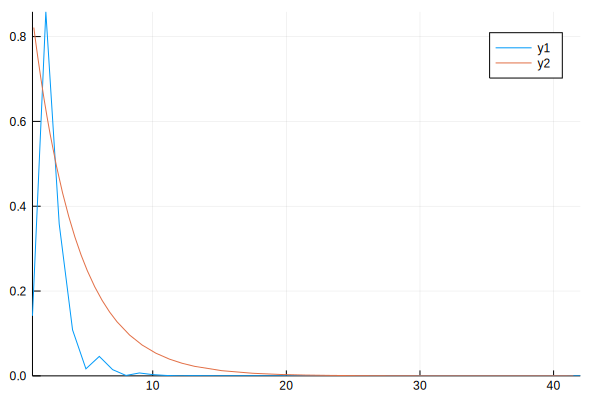

In [110]:
plot(distanciasin)
x=Sym("x")
plot!(exp(a1)*exp(b1*x))

# El algoritmo Babilónico

Un ejemplo de un algoritmo sorprendente es el *algoritmo Babilónico* (o de Herón) para calcular la raiz cuadrada $\sqrt{y}$ de un número real $y$. Una forma de este algoritmo se utiliza a menudo para calcular la raíz cuadrada en las computadoras.

Para un algoritmo, siempre necesitamos una *idea*, que toma una adivinanza $x_n$ y produce una (probablemente) mejor, $x_{n+1}$. La idea del algoritmo Babilónico es la siguiente.

#### Ejercicio 3

(i) ¿De cuál ecuación en $x$ es raíz el número $x^* = \sqrt{y}$? ¿Cuál otra solución de esta ecuación hay?

(ii) Dada una adivinanza $x_n$, es posible (pero improbable) que $x_n$ ya sea exactamente $\sqrt{y}$. ¿Cómo lo puedes verificar, sin utilizar (por supuesto) alguna función en Julia que calcule la raíz cuadrada? Escribe el código correspondiente.

(iii) Si $x_n$ no es raíz, demuestra con papel que $\frac{y}{x_n}$ se encuentra *del lado opuesto de $\sqrt{y}$ que $x_n$* sobre la recta real. [Pista: Hay dos casos que considerar.]

(iv) Así, tenemos dos valores que se encuentran por dos lados diferentes de $\sqrt{y}$. ¿Cuál sería una mejor adivinanza para $x_{n+1}$? Impleméntalo.

(v) Utiliza esta idea para escribir una función que calcule $\sqrt{y}$ para una $y$ dada.

(vi) ¿Qué tan rápido converge a la raíz cuadrada? Grafícalo. ¿Cómo se compara con el método de bisección?

In [111]:
#(i)
#Es solucion de la ecuacion x^2-y=0, la otra solucion sera x=-sqrt(y).

In [112]:
#(ii) Lo puedes verificar evaluando tu adivinanza en la funcion, si es igual a cero, es la raiz.
function verificar(y,err)
    f(x)=x^2-y
    if norm(f(y))<err
        true
    else
        false
    end
end

verificar (generic function with 1 method)

In [113]:
verificar(0,0.001)

true

In [114]:
#(iii)

Caso 1: tenemos que $x_{n}<\sqrt(y)$ entonces $\frac{1}{\sqrt(y)}<\frac{1}{x_{n}}$ luego $ \frac{y}{\sqrt(y)}<\frac{y}{x_{n}}$ pero $\frac{y \sqrt(y)}{\sqrt(y)\sqrt(y)}=\sqrt(y)$ que a su vez es mayor a $x_{n}$ lo cual implica que $x_{n}<\frac{y}{x_{n}}$ por lo que quedan de lados opuestos.

Caso 2:  ahora se tiene que $x_{n}>\sqrt(y)$ entonces $ \frac{1}{\sqrt(y)}>\frac{1}{x_{n}}$luego $ \frac{y}{\sqrt(y)}>\frac{y}{x_{n}}$ pero $\frac{y \sqrt(y)}{\sqrt(y)\sqrt(y)}=\sqrt(y)$ y en este caso tenemos que $x_{n}>\sqrt(y)$ por lo que $ x_{n}>\frac{y}{x_{n}}$, y así en ambos casos quedan de lados opuestos.

In [115]:
#(iv)

Lo mejor seria tomar el punto $x_{n+1}=\frac{x_{n}+\frac{y}{x_{n}}}{2}$, ya que $x_{n}$ y $\frac{y}{x_{n}}$  siempre estan de lados opuestos y el punto medio cada vez esta más cerca de la raíz.

In [116]:
#(v)
function raiz(y)
    f(x)=x^2-y
    error=0.00001
    xn=f(y)
     A=[]
if y>=0
    if xn<=error
        print(y)
     
    
    else
        while norm(f(xn))>error
        xn=punto_medio(xn,y/xn)
        push!(A,xn)      
        end
    
    return xn, A
   end
else
        print("Solo numeros positivos, intenta de nuevo")
    end
   
end

raiz (generic function with 1 method)

In [117]:
r2,u2=raiz(2)

(1.4142156862745097, Any[1.5, 1.41667, 1.41422])

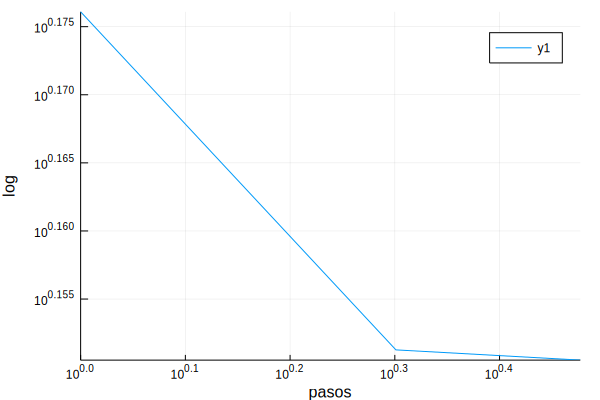

In [118]:
plot(u2, scale=:log, ylabel=("log"), xlabel=("pasos"))

In [119]:
distancia3=abs.(u2.-r2)

3-element Array{Float64,1}:
 0.0857843 
 0.00245098
 0.0       

In [120]:
x3=1:length(distancia3)-1
linreg(x3, log10.(distancia3[1:end-1]))

(0.477475925610674, -1.5440680443502777)

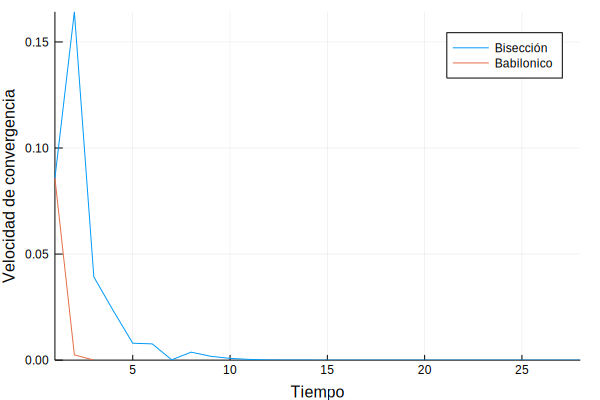

In [121]:
plot(distancia, label=("Bisección"), xlabel=("Tiempo"), ylabel=("Velocidad de convergencia"))
plot!(distancia3, label=("Babilonico"))

In [91]:
#El metodo de la biseccion tiene mayor velocidad de convergencia. 